In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTrain+.csv")
data_test = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTest+.csv")

In [3]:
print(data.shape)
print(data_test.shape)

(125973, 42)
(22544, 42)


In [4]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
data_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [8]:
print(data['class'].value_counts())

normal     67343
anomaly    58630
Name: class, dtype: int64


In [9]:
for col_name in data.columns:
    if data[col_name].dtype == 'object':
        unique_cat = len(data[col_name].unique())
        print('Feature {col_name} has {unique_cat} categories'.format(col_name=col_name,unique_cat=unique_cat))

print('\nCategories in service\n')
print(data['service'].value_counts().head())

Feature protocol_type has 3 categories
Feature service has 70 categories
Feature flag has 11 categories
Feature class has 2 categories

Categories in service

http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [10]:
for col_name in data_test.columns:
    if data_test[col_name].dtypes == 'object' :
        unique_cat = len(data_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print('\nCategories in service\n')
print(data_test['service'].value_counts().head())

Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'class' has 2 categories

Categories in service

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: service, dtype: int64


/home/subhash/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/subhash/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


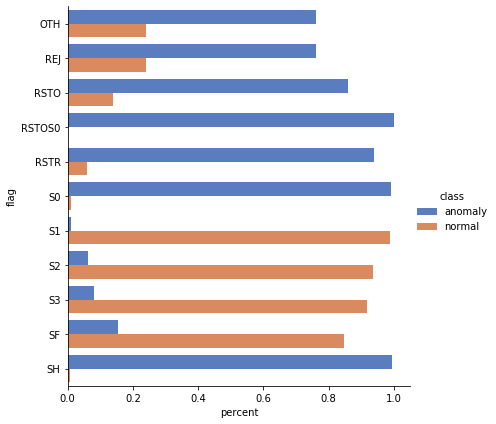

In [11]:
import seaborn as sns
flag_count = data[['flag', 'class']].groupby(['flag', 'class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

/home/subhash/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/subhash/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


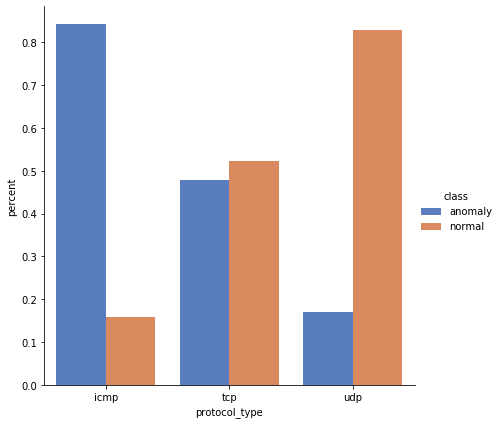

In [12]:
type_count = data[['protocol_type', 'class']].groupby(['protocol_type', 'class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

In [13]:
data.groupby('class').mean().T

class,anomaly,normal
duration,423.320689,168.587396
src_bytes,82820.141327,13133.279331
dst_bytes,37524.482159,4329.685223
land,0.000307,0.000104
wrong_fragment,0.048746,0.000000
urgent,0.000068,0.000148
hot,0.174262,0.230655
num_failed_logins,0.001040,0.001381
logged_in,0.034027,0.710646
num_compromised,0.017568,0.507076


1) Wrong fragments are present only in anomaly.

2) num_outboud_cmds are 0 for both anomaly and normal

3) connection duration is higher for anomaly

# LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
categorical_columns = ['protocol_type','service','flag']
data_categorical_values = data[categorical_columns]
testdata_categorical_values = data_test[categorical_columns]
data_categorical_values.head()

data_categorical_values_enc = data_categorical_values.apply(LabelEncoder().fit_transform)
testdata_categorical_values_enc = testdata_categorical_values.apply(LabelEncoder().fit_transform)
print(data_categorical_values_enc.head())
print(testdata_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


# OneHotEncoder

In [16]:
unique_protocol = sorted(data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]

unique_service = sorted(data.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]

unique_flag = sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#test
unique_service_test=sorted(data_test.service.unique())
unique_service2_test=[ string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print('\n')
print(testdumcols)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [17]:
enc = OneHotEncoder()
data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)

testdata_categorical_values_encenc = enc.fit_transform(testdata_categorical_values_enc)
testdata_cat_data = pd.DataFrame(testdata_categorical_values_encenc.toarray(),columns=testdumcols)
data_cat_data.head()
#testdata_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
trainservice=data['service'].tolist()
testservice= data_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_urh_i',
 'service_aol',
 'service_harvest',
 'service_http_8001',
 'service_red_i']

In [19]:
for col in difference:
    testdata_cat_data[col] = 0

testdata_cat_data.shape

(22544, 84)

In [20]:
newdata = data.join(data_cat_data)
newdata.drop('protocol_type',axis=1,inplace=True)
newdata.drop('service',axis=1,inplace=True)
newdata.drop('flag',axis=1,inplace=True)
print(newdata.shape)

newdata_test = data_test.join(testdata_cat_data)
newdata_test.drop('protocol_type',axis=1,inplace=True)
newdata_test.drop('service',axis=1,inplace=True)
newdata_test.drop('flag',axis=1,inplace=True)
print(newdata_test.shape)

(125973, 123)
(22544, 123)


In [21]:
newdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
newdata_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_http_2784,service_urh_i,service_aol,service_harvest,service_http_8001,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [23]:
newdata["class"].iloc[-5:,].head()

125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: class, dtype: object

In [24]:
classdf = newdata["class"]
newclassdf = classdf.replace({'normal': 0 , 'anomaly' : 1})
newdata["class"] = newclassdf
# values = ["class"]
# col = newdata[values]
# class_values_enc = col.apply(LabelEncoder().fit_transform)
classdf_test = newdata_test["class"]
newclassdf_test = classdf_test.replace({'normal': 0 , 'anomaly' : 1})
newdata_test["class"] = newclassdf_test

In [25]:
newdata["class"].head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [26]:
newdata_test["class"].head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [27]:
newdata["class"].iloc[-5:,].head()

125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, dtype: int64

# Feature Scaling

In [54]:
X_data = newdata.drop("class",axis=1)
y_data = newdata["class"]
colNames=list(X_data)
X_data = X_data[:].values

X_data_test = newdata_test.drop("class",axis=1)
y_data_test = newdata_test["class"]
colNames_test = list(X_data_test)
# X_data_test = X_data_test[:].values

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler_train = StandardScaler()

In [57]:
scaler_train.fit(X_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
X_data = scaler_train.transform(X_data)

In [59]:
print(X_data.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [60]:
print(X_data_test.std(axis=0))

duration               1407.176612
src_bytes            472786.431088
dst_bytes             21219.297609
land                      0.017619
wrong_fragment            0.142599
                         ...      
service_urh_i             0.000000
service_aol               0.000000
service_harvest           0.000000
service_http_8001         0.000000
service_red_i             0.000000
Length: 122, dtype: float64


# Feature Selection

## ANOVA F-TEST

In [61]:
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np

In [62]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [63]:
selector=SelectPercentile(f_classif, percentile=10)
X_newdata = selector.fit_transform(X_data,y_data)
X_newdata.shape

/home/subhash/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)


(125973, 13)

In [64]:
true=selector.get_support()
newcolindex_data=[i for i, x in enumerate(true) if x]
newcolname_data=list(colNames[i] for i in newcolindex_data)
newcolname_data

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']

In [65]:
print(X_newdata.shape)

(125973, 13)


In [66]:
print(X_newdata.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [67]:
X_data_test = X_data_test[newcolname_data]

In [68]:
X_data_test

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF
0,0,229,0.0,0.00,0.04,10,0.04,0.00,0.0,0.0,1.0,0.0,0.0
1,0,136,0.0,0.00,0.01,1,0.00,0.00,0.0,0.0,1.0,0.0,0.0
2,0,1,0.0,0.00,1.00,86,0.61,0.00,0.0,0.0,0.0,0.0,1.0
3,0,1,0.0,0.00,1.00,57,1.00,0.00,0.0,0.0,0.0,0.0,1.0
4,0,1,0.0,0.12,1.00,86,0.31,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,1,0.0,0.00,1.00,141,0.72,0.01,0.0,0.0,0.0,0.0,1.0
22540,1,2,0.0,0.00,1.00,255,1.00,0.01,0.0,1.0,0.0,0.0,1.0
22541,1,5,0.0,0.00,1.00,255,1.00,0.00,0.0,1.0,0.0,0.0,1.0
22542,0,4,0.0,0.00,1.00,252,0.99,0.00,0.0,0.0,0.0,0.0,1.0


In [69]:
X_data_test = X_data_test[:].values

In [70]:
X_data_test.shape

(22544, 13)

In [45]:
scaler_test = StandardScaler()
scaler_test.fit(X_data_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_data_test = scaler_test.transform(X_data_test)

In [47]:
print(X_data_test.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Building Model

In [48]:
X_train = np.reshape(X_newdata, (X_newdata.shape[0], 1, X_newdata.shape[1]))
X_test = np.reshape(X_data_test, (X_data_test.shape[0], 1, X_data_test.shape[1]))
y_train = np.array(y_data)
y_test = np.array(y_data_test)

In [49]:
batch_size = 32
print(X_train.shape)
print(X_test.shape)

(125973, 1, 13)
(22544, 1, 13)


In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [51]:
model = Sequential()
model.add(SimpleRNN(8,input_dim=13, return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(8, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/home/subhash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/subhash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(8, return_sequences=True, input_shape=(None, 13))`
  


In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_test, y_test))

Train on 125973 samples, validate on 22544 samples
Epoch 1/100
125973/125973 [==============================] - 28s 218us/step - loss: 0.1854 - accuracy: 0.9326 - val_loss: 0.6645 - val_accuracy: 0.7569
Epoch 2/100
125973/125973 [==============================] - 24s 194us/step - loss: 0.1476 - accuracy: 0.9474 - val_loss: 0.7124 - val_accuracy: 0.7506
Epoch 3/100
125973/125973 [==============================] - 31s 244us/step - loss: 0.1422 - accuracy: 0.9494 - val_loss: 0.7133 - val_accuracy: 0.7467
Epoch 4/100
125973/125973 [==============================] - 19s 150us/step - loss: 0.1396 - accuracy: 0.9507 - val_loss: 0.7111 - val_accuracy: 0.7417
Epoch 5/100
125973/125973 [==============================] - 28s 220us/step - loss: 0.1368 - accuracy: 0.9519 - val_loss: 0.7339 - val_accuracy: 0.7444
Epoch 6/100
125973/125973 [==============================] - 21s 163us/step - loss: 0.1338 - accuracy: 0.9534 - val_loss: 0.7158 - val_accuracy: 0.7455
Epoch 7/100
125973/125973 [==========

KeyboardInterrupt: 

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

22544/22544 [==============================] - 1s 61us/step

Loss: 0.75, Accuracy: 74.00%
